In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Q1

In [2]:
df_01 = pd.read_parquet("./data/yellow_tripdata_2023-01.parquet")
len(df_01.columns)

19

# Q2

In [3]:
df_01.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
df_01["duration"] = df_01["tpep_dropoff_datetime"] - \
    df_01["tpep_pickup_datetime"]
df_01["duration"] = df_01["duration"].apply(lambda td: td.total_seconds() / 60)

In [5]:
np.std(df_01.duration)

42.59434429744777

# Q3

In [6]:
df_01_cleaned = df_01[(df_01.duration >= 1) & (df_01.duration <= 60)]

<Axes: xlabel='duration', ylabel='Count'>

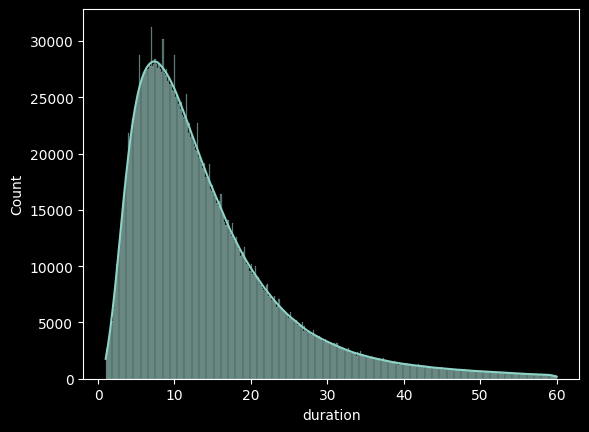

In [7]:
sns.histplot(df_01_cleaned.duration, kde=True)

In [8]:
len(df_01_cleaned) / len(df_01) * 100

98.1220282212598

# Q4

In [9]:
categorical = ["PULocationID", "DOLocationID"]

df_01_cleaned[categorical] = df_01_cleaned[categorical].astype(str)

train_dicts = df_01_cleaned[categorical].to_dict(orient="records")

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

/var/folders/np/33y454c53ydc4yc3nh7tm3s80000gn/T/ipykernel_22443/135983976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01_cleaned[categorical] = df_01_cleaned[categorical].astype(str)


In [10]:
X_train.shape

(3009173, 515)

# Q5

In [11]:
target = "duration"
y_train = df_01_cleaned[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

/Users/hongweichua/miniforge3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.649261927686161

# Q6

In [22]:
df_val = pd.read_parquet("./data/yellow_tripdata_2023-02.parquet")

In [23]:
df_val["duration"] = df_val["tpep_dropoff_datetime"] - \
    df_val["tpep_pickup_datetime"]
df_val["duration"] = df_val["duration"].apply(
    lambda td: td.total_seconds() / 60)

In [24]:
df_val_cleaned = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

In [25]:
target = "duration"
y_val = df_val_cleaned[target].values

In [26]:
df_val_cleaned[categorical] = df_val_cleaned[categorical].astype(str)
val_dicts = df_val_cleaned[categorical].to_dict(orient="records")
X_val = dv.transform(val_dicts)
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/var/folders/np/33y454c53ydc4yc3nh7tm3s80000gn/T/ipykernel_22443/1787714968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_cleaned[categorical] = df_val_cleaned[categorical].astype(str)
/Users/hongweichua/miniforge3/envs/mlops/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.811817957524739